In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
!pip install seaborn

In [16]:
calorie = pd.read_csv('calories-prediction-data/calories.csv')
exercise = pd.read_csv('calories-prediction-data/exercise.csv')

In [17]:
calorie.head(10)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [18]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [19]:
calories_data = pd.concat([exercise, calorie['Calories']], axis=1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [20]:
calories_data.to_csv('calorie_data.csv',index=False)

In [21]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [22]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [23]:
calories_data.duplicated().sum()

0

In [24]:
outliers = calories_data[( calories_data['Weight'] < 25) | (calories_data['Weight'] > 200)]
print(outliers)

Empty DataFrame
Columns: [User_ID, Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Calories]
Index: []


In [25]:
calories_data.shape

(15000, 9)

In [26]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [27]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


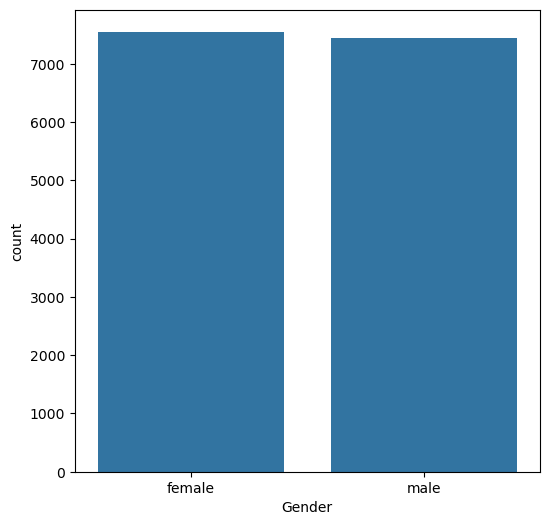

In [28]:
calories_data['Gender'] = calories_data['Gender'].astype('category')
plt.figure(figsize=(6, 6))
sns.countplot(data=calories_data, x='Gender')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12860\39507317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


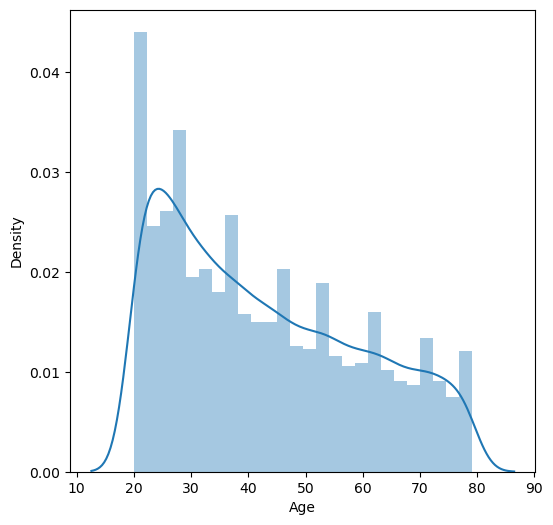

In [29]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Age'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12860\1046697126.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


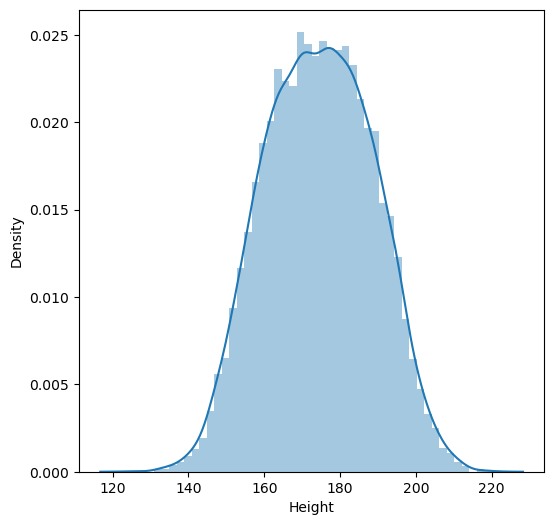

In [30]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Height'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12860\29650283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


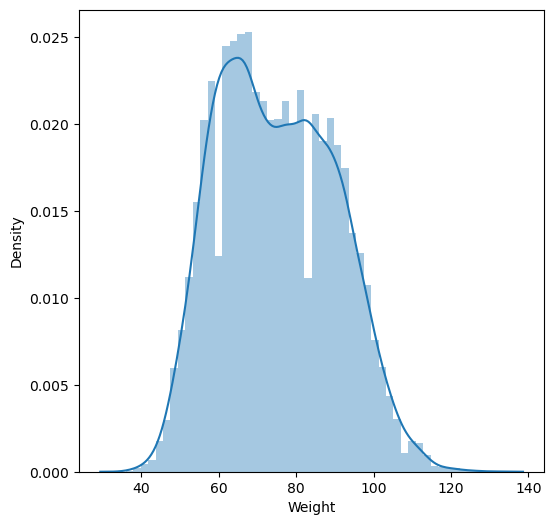

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Weight'])
plt.show()

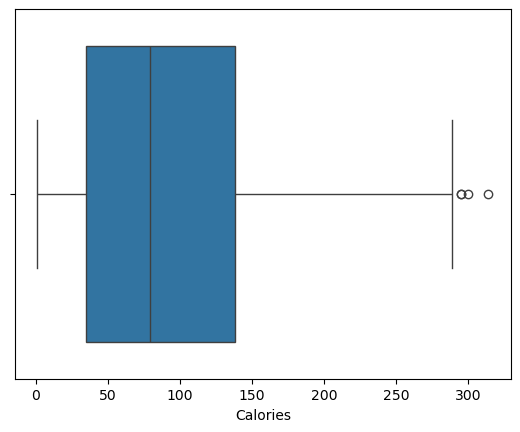

In [32]:
sns.boxplot(x='Calories',data=calories_data)
plt.show()

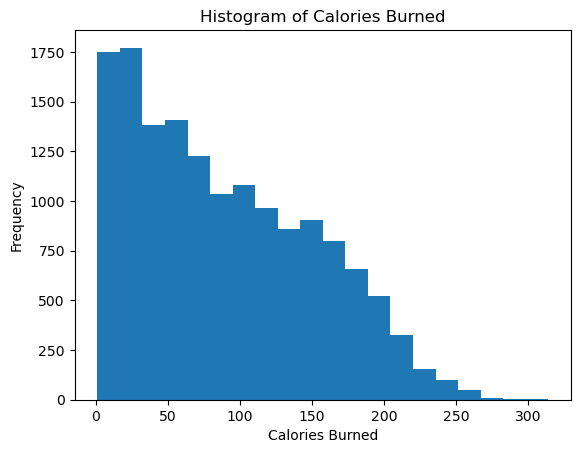

In [33]:
plt.hist(calories_data['Calories'], bins=20)
plt.title('Histogram of Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()

In [36]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [40]:
calories_data['Age'].min()

20

In [41]:
calories_data['Age'].max()

79

In [44]:
calories_data['Height'].min()

123.0

In [45]:
calories_data['Height'].max()

222.0

In [47]:
calories_data['Weight'].min()

36.0

In [48]:
calories_data['Weight'].max()

132.0

In [50]:
calories_data['Heart_Rate'].min()

67.0

In [51]:
calories_data['Heart_Rate'].max()

128.0

In [52]:
calories_data['Body_Temp'].min()

37.1

In [53]:
calories_data['Body_Temp'].max()

41.5

In [59]:
calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12860\3573112374.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12860\3573112374.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)


In [60]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [61]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)

In [63]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [64]:
y = calories_data['Calories']

In [65]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [89]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
4741,1,22,182.0,74.0,9.0,85.0,39.8
6160,0,20,194.0,92.0,10.0,92.0,39.7
9466,1,68,164.0,65.0,11.0,97.0,39.7
12802,0,49,193.0,87.0,9.0,85.0,39.8
8391,1,70,167.0,64.0,22.0,97.0,40.4
...,...,...,...,...,...,...,...
11256,0,22,202.0,105.0,30.0,113.0,41.0
14501,0,42,176.0,76.0,12.0,96.0,40.0
14343,0,39,179.0,79.0,18.0,97.0,40.0
14555,0,61,194.0,92.0,24.0,99.0,40.9


In [69]:
X_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
11499,1,45,154.0,52.0,26.0,107.0,40.6
6475,0,21,187.0,90.0,29.0,111.0,40.5
13167,0,58,176.0,77.0,11.0,90.0,40.0
862,0,35,182.0,89.0,24.0,108.0,40.8
5970,1,67,171.0,67.0,29.0,116.0,41.1
...,...,...,...,...,...,...,...
6216,1,61,166.0,66.0,28.0,106.0,41.0
3585,1,73,165.0,66.0,10.0,92.0,40.0
10023,1,38,169.0,66.0,20.0,104.0,40.2
14044,1,25,163.0,54.0,5.0,86.0,39.2


In [72]:
y_train

9839      17.0
9680     167.0
7093      40.0
11293     34.0
820       23.0
         ...  
5191     151.0
13418    114.0
5390      41.0
860       57.0
7270      59.0
Name: Calories, Length: 12000, dtype: float64

In [73]:
y_test

11499    173.0
6475     189.0
13167     53.0
862      161.0
5970     226.0
         ...  
6216     186.0
3585      53.0
10023    120.0
14044     20.0
12965    214.0
Name: Calories, Length: 3000, dtype: float64

In [74]:
### Linear Regression

In [75]:
from sklearn import linear_model

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
reg = linear_model.LinearRegression()

In [147]:
reg.fit(X_train, y_train)

LinearRegression()

In [92]:
y_train_preds = reg.predict(X_train)
y_test_preds = reg.predict(X_test)

In [93]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [115]:
r2_score_train = r2_score(y_train, y_train_preds)
print("R-Sqaured value of training data : ", r2_score_train)

R-Sqaured value of training data :  0.9678574730588712


In [116]:
r2_score_test = r2_score(y_test, y_test_preds)
print("R-Sqaured value of testing data : ", r2_score_test)

R-Sqaured value of testing data :  0.9645640644517228


In [97]:
mae_train = mean_absolute_error(y_train, y_train_preds)
print("MAE of training data : ", mae_train)

MAE of training data :  8.275878127536552


In [99]:
mae_test = mean_absolute_error(y_test, y_test_preds)
print("MAE of testing data : ", mae_test)

MAE of testing data :  8.556537349005167


In [101]:
mse_train = mean_squared_error(y_train, y_train_preds)
print("MSE of training data : ", mse_train)

MSE of training data :  125.11990417089989


In [103]:
mse_test = mean_squared_error(y_test, y_test_preds)
print("MSE of testing data : ", mse_test)

MSE of testing data :  139.3462433528991


In [104]:
### RandomForest Regressor

In [242]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
reg_rf = RandomForestRegressor(n_estimators=500,random_state=1)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=1)

In [243]:
y_train_preds = reg_rf.predict(X_train)
y_test_preds = reg_rf.predict(X_test)

In [244]:
r2_score_train_rf = r2_score(y_train, y_train_preds)
print("R-Sqaured value of training data : ", r2_score_train_rf)

R-Sqaured value of training data :  0.9997197483331506


In [245]:
r2_score_test_rf = r2_score(y_test, y_test_preds)
print("R-Sqaured value of testing data : ", r2_score_test_rf)

R-Sqaured value of testing data :  0.9978371954544628


In [246]:
mae_train_rf = mean_absolute_error(y_train, y_train_preds)
print("MAE of training data : ", mae_train_rf)

MAE of training data :  0.6401588333333333


In [247]:
mae_test_rf = mean_absolute_error(y_test,y_test_preds)
print("MAE of testing data : ", mae_test_rf)

MAE of testing data :  1.7994106666666667


In [248]:
mse_train_rf = mean_squared_error(y_train, y_train_preds)
print("MSE of training data : ", mse_train_rf)

MSE of training data :  1.0909242376666666


In [249]:
mse_test_rf = mean_squared_error(y_test, y_test_preds)
print("MSE of testing data : ", mse_test_rf)

MSE of testing data :  8.50488872


In [ ]:
### XGBoost

In [157]:
pip install xgboost


  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [234]:
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
reg_xg = XGBRegressor(n_estimators=500)
reg_xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [235]:
y_train_preds_xg = reg_xg.predict(X_train)
y_test_preds_xg = reg_xg.predict(X_test)

In [236]:
r2_train_xg = r2_score(y_train, y_train_preds_xg)
print("R2-score of training data : ", r2_train_xg)

R2-score of training data :  0.9999511645522691


In [237]:
r2_test_xg = r2_score(y_test, y_test_preds_xg)
print("R2 score of testing data : ", r2_test_xg)

R2 score of testing data :  0.9989941841402185


In [238]:
mae_train_xg = mean_absolute_error(y_train, y_train_preds_xg)
print("MAE of training data : ", mae_train_xg)

MAE of training data :  0.30664351081848146


In [239]:
mae_test_xg = mean_absolute_error(y_test, y_test_preds_xg)
print("MSE of testing data : ", mae_test_xg)

MSE of testing data :  1.305049524853627


In [240]:
mse_train_xg = mean_squared_error(y_train, y_train_preds_xg)
print("MSE of training data : ", mse_train_xg)

MSE of training data :  0.19009975635802065


In [241]:
mse_test_xg = mean_squared_error(y_test, y_test_preds_xg)
print("MSE of testing data : ", mse_test_xg)

MSE of testing data :  3.9552126787898585


In [250]:
### Prediction
#['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','Body_Temp']

In [265]:
test_df = [[1,23,159.0,54.0,30.0,96.0,36.5]]
test_data_prediction = reg_xg.predict(test_df)
print(test_data_prediction)

[154.65402]


In [252]:
calorie_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [266]:
import joblib

In [267]:
joblib.dump(reg_xg, 'model.pkl')

['model.pkl']

In [268]:
joblib.load('model.pkl')

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)